# 1. What is PyTorch

In [1]:
from __future__ import print_function
import torch

## 1.1 Basic Operations of Torch Tensor

- torch.empty

- torch.rand & torch.rand_like

- torch.zeros

- torch.tensor

- torch.ones & tensor.new_ones

- tensor.size & tensor.view
    
- tensor.add & tensor.add_

- tensor[:2] & tensor[:, 2]

- tensor.item & tensor.tolist

In [40]:
print(torch.empty(5, 3))  # 数字是0、无穷大或无穷小，也有一般值

tensor([[0.0000e+00, 3.6893e+19, 0.0000e+00],
        [3.6893e+19, 5.6052e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.6893e+19, 6.3906e-08]])


In [41]:
print(torch.rand(5, 3))

tensor([[0.7725, 0.2715, 0.8958],
        [0.6532, 0.1087, 0.6823],
        [0.6785, 0.1455, 0.8845],
        [0.0747, 0.5234, 0.7176],
        [0.3726, 0.8948, 0.9992]])


In [42]:
print(torch.zeros(5, 3, dtype=torch.long))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [43]:
x = torch.tensor([[5.5, 3], [4.8, 8.1]])
print(x)

tensor([[5.5000, 3.0000],
        [4.8000, 8.1000]])


In [13]:
x = torch.randn_like(x, dtype=torch.float)
print(x)
print(x.size())  # torch.Size is in fact a tuple, so it supports all tuple operations

tensor([[-1.4449, -1.7807,  0.5049],
        [ 1.7135,  0.9671, -1.1484],
        [-0.5042, -0.0579, -0.4078],
        [-0.0944,  0.1655,  0.2645],
        [-2.1989,  0.2521,  0.7114]])
torch.Size([5, 3])


In [44]:
print(x.new_ones(5, 3, dtype=torch.double))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [23]:
y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))  # Same with +
print(y.add(x))

result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

# Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.
y.add_(x)  # Inplace Addition   
print(y)

# Use standard NumPy-like indexing with all bells and whistles!
print(y[:2])   # 前2个vector
print(y[:, 1]) # 第1列

tensor([[-0.9307, -1.2709,  1.0478],
        [ 2.2759,  1.5239, -0.7382],
        [ 0.2152,  0.5509,  0.1529],
        [ 0.7290,  0.3528,  0.7645],
        [-2.0706,  0.6540,  1.1559]])
tensor([[-0.9307, -1.2709,  1.0478],
        [ 2.2759,  1.5239, -0.7382],
        [ 0.2152,  0.5509,  0.1529],
        [ 0.7290,  0.3528,  0.7645],
        [-2.0706,  0.6540,  1.1559]])
tensor([[-0.9307, -1.2709,  1.0478],
        [ 2.2759,  1.5239, -0.7382],
        [ 0.2152,  0.5509,  0.1529],
        [ 0.7290,  0.3528,  0.7645],
        [-2.0706,  0.6540,  1.1559]])
tensor([[-0.9307, -1.2709,  1.0478],
        [ 2.2759,  1.5239, -0.7382],
        [ 0.2152,  0.5509,  0.1529],
        [ 0.7290,  0.3528,  0.7645],
        [-2.0706,  0.6540,  1.1559]])
tensor([[-0.9307, -1.2709,  1.0478],
        [ 2.2759,  1.5239, -0.7382],
        [ 0.2152,  0.5509,  0.1529],
        [ 0.7290,  0.3528,  0.7645],
        [-2.0706,  0.6540,  1.1559]])
tensor([[-0.9307, -1.2709,  1.0478],
        [ 2.2759,  1.5239, -0.738

In [27]:
# Resize shape: tensor.view
print(torch.rand(4, 3).view(12))
print(torch.rand(4, 3).view(2, 6))
print(torch.rand(4, 3).view(-1, 6))  # the size -1 is inferred from other dimensions

tensor([0.8293, 0.5293, 0.6516, 0.2408, 0.2705, 0.9424, 0.7717, 0.2853, 0.9992,
        0.2992, 0.0179, 0.5161])
tensor([[0.7520, 0.8426, 0.7543, 0.1428, 0.0101, 0.8947],
        [0.0070, 0.4272, 0.4334, 0.6758, 0.7053, 0.6084]])
tensor([[0.7501, 0.3438, 0.0324, 0.7472, 0.7930, 0.7767],
        [0.2618, 0.2395, 0.3214, 0.9655, 0.7449, 0.9825]])


In [30]:
print(torch.randn(1).item())  # Get a Python number from a tensor containing a single value

-0.12467533349990845


In [67]:
print(torch.randn(2, 3).tolist()) # Get a Python list from a tensor containing many values

[[0.9341114163398743, -0.3458023965358734, -0.2878834903240204], [-2.503565549850464, -0.7918197512626648, -1.3584527969360352]]


## 1.2 Torch Tensor < -- > NumPy Array

They will share their underlying memory locations, and **changing one will change the other**.

- tensor.numpy() --> numpy array

- torch.from_numpy(numpy array) --> torch tensor

In [37]:
a = torch.ones(3, 4)
b = a.numpy()
b

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [38]:
a.add_(1)
print(a)
b

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]], dtype=float32)

In [39]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# 2. Autograd: Automatic Differentiation

Central to all neural networks in PyTorch is the ***autograd*** package. It provides automatic differentiation for all operations on Tensors. It's a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

## 2.1 Tensor

***torch.Tensor*** is the central class of the package. If you set its attribute ***.requires_grad*** as True, it starts to track all operations on it. When you finish your computation you can call ***.backward()*** and have all the gradients computed automatically. The gradient for this tensor will be accumulated into ***.grad*** attribute.

In [45]:
import torch

In [46]:
x = torch.ones(2, 2, requires_grad=True)  # Defaults to False  x.requires_grad_(False) will change to False in-place
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [48]:
y = x + 2
print(y)
print(y.grad_fn)  # y was created as a result of an operation, so it has a grad_fn.

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [50]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward1>)


## 2.2 Gradients

Generally speaking, ***torch.autograd*** is an engine for computing vector-Jacobian product

In [51]:
out.backward()

In [53]:
print(x.grad) # d(out)/dx 

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# 3. Neural Networks

Neural networks can be constructed using the ***torch.nn*** package.

***nn*** depends on ***autograd*** to define models and differentiate them. An ***nn.Module*** contains layers, and a method ***forward(input)*** that returns the output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)

- Iterate over a dataset of inputs

- Process input through the network

- Compute the loss (how far is the output from being correct)

- Propagate gradients back into the network’s parameters

- Update the weights of the network, typically using a simple update rule: ***weight = weight - learning_rate * gradient***

## 3.1 Define the Network

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

We just have to define the ***\_\_init\_\_*** and the ***forward*** function, and the ***backward*** function (where gradients are computed) is automatically defined for you using ***autograd***

In [37]:
class Net(nn.Module):  # nn.Module: Base class for all neural network modules. Your models should also subclass this class.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)  # 为什么输入需要是32*32 ？
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)  # An affine operation: y = Wx + b
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    # Conv2d和Linear属于Layer范畴，来自于nn，定义在__init__里，而max_pool2d和relu属于functional范畴，来自于F=nn.functional，定义在forward里！
    # Structure: input-->conv1-->relu-->max_pool2d-->conv2-->relu-->max_pool2d-->view-->fc1-->relu-->fc2-->relu-->fc3
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))   # Max Pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)        # If the size is a square, you can only specify a single number
        x = x.view(-1, np.prod(x.size()[1:]))             # batch dimension之外的dimension相乘
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [38]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [39]:
list(net.parameters())[0]  # conv1's .weight

Parameter containing:
tensor([[[[ 0.0096, -0.0146,  0.1165,  0.1517,  0.1280],
          [-0.0387, -0.1381, -0.1021, -0.0893,  0.1611],
          [-0.1267,  0.0353,  0.1368, -0.1255,  0.1639],
          [ 0.0874, -0.0690, -0.1079,  0.1732, -0.0358],
          [-0.1358,  0.0208,  0.1711,  0.1663, -0.1493]]],


        [[[-0.1793,  0.0615,  0.0538, -0.1476,  0.0203],
          [ 0.0992,  0.1008,  0.1627, -0.0625, -0.1988],
          [ 0.1879, -0.1236, -0.1700, -0.0055,  0.0679],
          [-0.1129, -0.1276,  0.0227, -0.0375,  0.1788],
          [ 0.1206, -0.0703, -0.1270, -0.0672, -0.0485]]],


        [[[ 0.1248,  0.0423,  0.1732,  0.0402, -0.0659],
          [-0.1116,  0.0453,  0.0711,  0.1744, -0.0561],
          [ 0.0306, -0.0745,  0.0090, -0.0544,  0.1572],
          [-0.1756, -0.1798, -0.0988,  0.1113, -0.1086],
          [-0.1931,  0.0937, -0.1316,  0.0583, -0.0173]]],


        [[[-0.0929, -0.1267,  0.0503,  0.0175,  0.1571],
          [ 0.0360, -0.0737,  0.1474, -0.1901,  0.0339

In [40]:
input = torch.randn(1, 1, 32, 32)
print(input)

tensor([[[[ 0.6037,  1.4687, -1.9032,  ...,  0.4374,  0.6948,  0.9238],
          [-0.8192,  0.4986, -0.2325,  ..., -0.4423, -0.2899, -1.5858],
          [-1.5947, -0.6475,  1.4343,  ..., -0.5507,  0.3688, -1.0173],
          ...,
          [ 0.6210,  0.9085,  0.0089,  ..., -0.6819,  2.6848, -0.0111],
          [ 0.3846, -0.0431,  1.3146,  ..., -0.1887,  1.1367, -0.4960],
          [ 1.0715, -1.3381,  1.5364,  ...,  0.0486,  1.4302, -1.7637]]]])


In [41]:
print(net(input))          # PyTorch中Model可直接作用于input，相当于对其进行前向传播计算，就像函数一样！实质是调用了Model的forward方法
print(net.forward(input))  # Same with net(input)

tensor([[-0.0487, -0.0073,  0.0879, -0.0596, -0.0364, -0.0173, -0.0623,  0.0081,
          0.0340,  0.0165]], grad_fn=<AddmmBackward>)
tensor([[-0.0487, -0.0073,  0.0879, -0.0596, -0.0364, -0.0173, -0.0623,  0.0081,
          0.0340,  0.0165]], grad_fn=<AddmmBackward>)


## 3.2 Loss Function

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

In [53]:
output = net(input)
target = torch.randn(10).view(1, -1)
loss = nn.MSELoss()(output, target)
print(loss)

tensor(1.1216, grad_fn=<MseLossBackward>)


So, when we call ***loss.backward()***, the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that has ***requires_grad=True*** will have their ***.grad*** Tensor accumulated with the gradient.

In [54]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # Relu

## 3.3 Backprop

To **backpropagate the error** all we have to do is to ***loss.backward()***. You need to **clear the existing gradients though**, else gradients will be accumulated to existing gradients.

In [55]:
net.zero_grad()           # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward: ')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward: ')
print(net.conv1.bias.grad)

conv1.bias.grad before backward: 
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward: 
tensor([ 0.0026,  0.0107,  0.0082,  0.0096, -0.0055, -0.0157])


## 3.4 Update the Weights

The simplest update rule used in practice is the **Stochastic Gradient Descent (SGD)**:  weight = weight - learning_rate * gradient

We can implement this using simple python code:

In [56]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

Package ***torch.optim*** implements various different update rules: **SGD, Nesterov-SGD, Adam, RMSProp, etc**.

In [58]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Belows are in your training loop
optimizer.zero_grad()                  # zero the gradient buffers
output = net(input)
loss = nn.MSELoss()(output, target)
loss.backward()
optimizer.step()                       # Does the update

# 4. Training a Classifier

What about data?

Generally, when dealing with image, text, audio or video data, you can load data into a *NumPy Array*, then convert it into a **torch.\*Tensor**

**data** --> **Numpy Array** --> **torch.\*Tensor**

Steps to train an image classifier:

- Load and normalizing the CIFAR10 training and test datasets using *torchvision*

- Define a Convolutional Neural Network

- Define a loss function

- Train the network on the training data

- Test the network on the test data

## 4.1 Loading and Normalizing CIFAR10

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms

In [29]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)  # 下载数据并进行Transformation
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)          # 数据加载器，可按batch_size进行mini-batch式的遍历

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1, 2, 0)))
    plt.show()

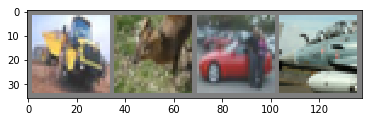

['truck', 'deer', 'car', 'plane']


In [32]:
train_iter = iter(trainloader)     # 生成针对trainloader的迭代器！
images, labels = train_iter.next()

imshow(torchvision.utils.make_grid(images))
print([classes[labels[j]] for j in range(4)])

## 4.2 Define a Convolutional Neural Network

Almost same with 3.1, except that now we take 3-channel images instead of 1-channel images

In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [34]:
class Net(nn.Module):  # nn.Module: Base class for all neural network modules. Your models should also subclass this class.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)      # 与3.1不同，maxpooling此时也可定义在__init__里，forward里只使用这一个shared的Layer!
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    # Structure: input-->conv1-->relu-->pool-->conv2-->relu-->pool-->view-->fc1-->relu-->fc2-->relu-->fc3
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)                      # 疑惑：Softmax或Sigmoid函数在哪里？？？
        return x

In [50]:
net = Net()

## 4.3 Define a Loss Function and Optimizer

In [51]:
import torch.optim as optim

# 在训练Loop外面事先定义后Loss和Optimizer，在训练Loop中可以多次使用
criterion = nn.CrossEntropyLoss()                                # Classification Cross-Entropy Loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # SGD with momentum

## 4.4 Train the Network

Things start to get interesting. We simply loop over our data iterator, and feed the inputs to the network and optimize.

In [52]:
# 手动编写训练过程，在Keras里只有一行：model.fit(x, y, epochs, optimizer, )
epochs = 2
for epoch in range(epochs):   # 手动遍历epochs次整个训练集
    running_loss = 0.0
    for i, data in enumerate(trainloader):  # 对于每次遍历，手动指定每次的mini-batch的data，及后续如何使用data来计算loss，让loss进行backward，随后optimize
        inputs, labels = data
        optimizer.zero_grad()               # zero the parameter gradients
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()  # 当前2000个mini-batches的loss之和
        if i % 2000 == 1999:         # print every 2000 mini-batches
            print('Epoch: %d  i: %5d  avg_loss: %.3f  current_loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000, loss.item()))
            runnning_loss = 0.0

Epoch: 1  i:  2000  avg_loss: 2.178  current_loss: 1.712
Epoch: 1  i:  4000  avg_loss: 3.980  current_loss: 0.763
Epoch: 1  i:  6000  avg_loss: 5.624  current_loss: 2.094
Epoch: 1  i:  8000  avg_loss: 7.187  current_loss: 1.520
Epoch: 1  i: 10000  avg_loss: 8.702  current_loss: 2.115
Epoch: 1  i: 12000  avg_loss: 10.141  current_loss: 1.325
Epoch: 2  i:  2000  avg_loss: 1.379  current_loss: 1.600
Epoch: 2  i:  4000  avg_loss: 2.718  current_loss: 1.659
Epoch: 2  i:  6000  avg_loss: 4.073  current_loss: 1.359
Epoch: 2  i:  8000  avg_loss: 5.372  current_loss: 1.438
Epoch: 2  i: 10000  avg_loss: 6.658  current_loss: 1.734
Epoch: 2  i: 12000  avg_loss: 7.932  current_loss: 1.163


## 4.5 Test the Network on the Test Data

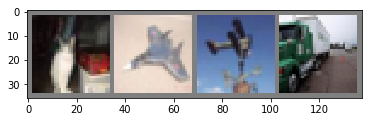

GroudTruth:  ['  cat', 'plane', 'plane', 'truck']


In [53]:
test_iter = iter(testloader)
images, labels = test_iter.next()

imshow(torchvision.utils.make_grid(images))
print('GroudTruth: ', ['%5s' % classes[labels[j]] for j in range(4)])

In [54]:
outputs = net(images)                   # net是模型实例，应用的话直接当作函数来使用！代替了net.predict
_, predicted = torch.max(outputs, 1)    # outputs和outputs.data 都阔以~
print('Predicted: ', ['%5s' % classes[labels[j]] for j in range(4)])

Predicted:  ['  cat', 'plane', 'plane', 'truck']


In [55]:
correct, total = 0, 0
with torch.no_grad():   # 应用时要设置no_grad???
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d%%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 56%


What are the classes that performed well, and the classes that didn't perform well:

In [68]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):                      # 因为batch_size=4，所以每次labels只有4个
            label = labels[i]
            class_correct[label] += c[i].item() # Use torch.Tensor.item() to get a Python number from a tensor containing a single value
            class_total[label] += 1

In [69]:
for i in range(10):
    print('Accuracy of %5s : %2d%%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58%
Accuracy of   car : 67%
Accuracy of  bird : 50%
Accuracy of   cat : 31%
Accuracy of  deer : 50%
Accuracy of   dog : 59%
Accuracy of  frog : 60%
Accuracy of horse : 62%
Accuracy of  ship : 57%
Accuracy of truck : 69%


## 4.6 Training on GPU

First define our devices as the 1st visible cuda device if we have CUDA available:

In [72]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [76]:
net.to(device)  # Recursively go over all modules and convert their parameters and buffers to CUDA tensors

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Remember that you will have to send the inputs and targets **at every step** to the GPU too:

In [78]:
inputs, labels = inputs.to(device), labels.to(device)

# 5. Data Parallelism

In [ ]:
device = torch.device('cuda:0')
model.to(device)                 # put the model on a GPU
mytensor = my_tensor.to(device)  # copy all tensors to the GPU

Please note that just calling ***my_tensor.to(device)*** returns a new copy of *my_tensor* on GPU instead of rewriting *my_tensor*. You need to assign it to a new tensor and use that tensor on the GPU.